In [1]:
# Загрузите датасет в pandas DataFrame под названием df

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# смотрим сводную информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Выполните предварительную обработку данных, выполнив следующие шаги: a. Определите и обработайте отсутствующие значения в датасете. 
# Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, 
# или отбросить столбцы/строки с существенными отсутствующими значениями)

In [7]:
# убираем данные, где процент пропущенных значений превышает 40%, т.к. в этом случае результаты можно рассматривать только как гипотезы 
pd.set_option('display.max_rows', None)
temp = (df.isna().sum() / len(df)).round(4) * 100
temp_name = temp[temp > 40.0].index
df = df.drop(columns=temp_name)
df.isna().sum()[df.isna().sum()>0]

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [8]:
# создаем список названий столбцов где есть нулевые значения
temp = df.isna().sum()
temp_name = temp[temp > 0].index

In [9]:
# заполняем пропущенные значения (числовые - средним значением, остальные - модой)
for i in temp_name:
    df[i] = df[i].fillna(df[i].mode()[0]) if df[i].dtype == 'O' else df[i].fillna(df[i].mean())

In [10]:
df[temp_name].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1460 non-null   float64
 1   MasVnrArea    1460 non-null   float64
 2   BsmtQual      1460 non-null   object 
 3   BsmtCond      1460 non-null   object 
 4   BsmtExposure  1460 non-null   object 
 5   BsmtFinType1  1460 non-null   object 
 6   BsmtFinType2  1460 non-null   object 
 7   Electrical    1460 non-null   object 
 8   GarageType    1460 non-null   object 
 9   GarageYrBlt   1460 non-null   float64
 10  GarageFinish  1460 non-null   object 
 11  GarageQual    1460 non-null   object 
 12  GarageCond    1460 non-null   object 
dtypes: float64(3), object(10)
memory usage: 148.4+ KB


In [11]:
# удаляем дубликаты
df = df.drop_duplicates()

In [12]:
# Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: a. Каково распределение целевой 
# переменной 'SalePrice'? Есть ли какие-либо выбросы? b. Исследуйте взаимосвязи между целевой переменной и 
# другими характеристиками. Есть ли сильные корреляции? c. Исследуйте распределение и взаимосвязи других важных 
# характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. d. Визуализируйте данные, 
# используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), 
# чтобы получить представление о датасете.

In [13]:
# Каково распределение целевой переменной 'SalePrice'?
import scipy.stats as stats
stats.shapiro(df['SalePrice'])

ShapiroResult(statistic=np.float64(0.8696714665902145), pvalue=np.float64(3.2061412312021656e-33))

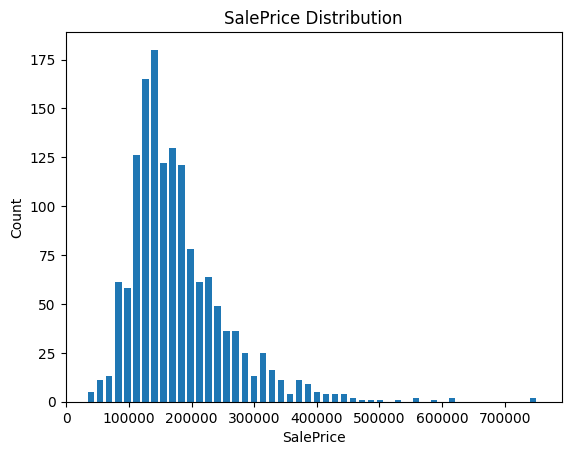

In [14]:
# выведем график распределения SalePrice
import matplotlib.pyplot as plt
plt.hist(df['SalePrice'], bins=50, width = 10000)
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.title('SalePrice Distribution')
plt.show()

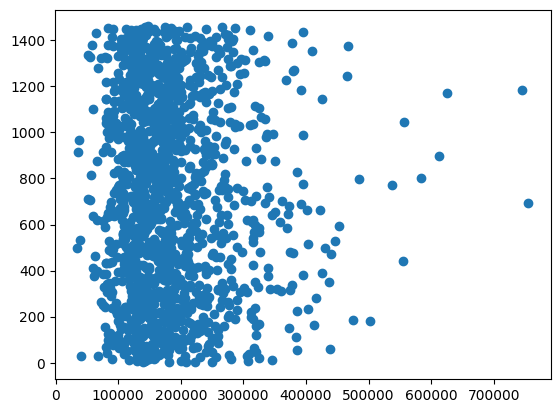

In [15]:
# проверяем выбросы
plt.scatter(df['SalePrice'], df['Id'])

In [16]:
z_scores = stats.zscore(df['SalePrice'])
threshold = 3
outliers = df['SalePrice'][z_scores > threshold]
len(outliers)
# обнаружено около 22 значений, которые можно считать выбросами

22

In [17]:
# Исследуйте взаимосвязи между целевой переменной и другими числовыми характеристиками
# получаем имена всех числовых столбцов
temp_name = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64']]
# строим таблицу корреляций с сортировкой коэффициентов
correlation = df[temp_name].corr()
correlation['SalePrice'].sort_values(ascending=False)
# выявлены сильные корреляции с характеристиками OverallQual и GrLivArea

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [18]:
# Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д
# За важные принимаем характеристики степени корреляции которых > 0.5
temp_name = correlation[correlation['SalePrice'] > 0.5].index
temp_name

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [19]:
# создаем таблицу корреляций
corr_table = df[temp_name].corr()
corr_table

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.572323,0.550684,0.537808,0.476224,0.593007,0.550600,0.427452,0.600671,0.562022,0.790982
YearBuilt,0.572323,1.000000,0.592855,0.391452,0.281986,0.199010,0.468271,0.095589,0.537850,0.478954,0.522897
YearRemodAdd,0.550684,0.592855,1.000000,0.291066,0.240379,0.287389,0.439046,0.191740,0.420622,0.371600,0.507101
TotalBsmtSF,0.537808,0.391452,0.291066,1.000000,0.819530,0.454868,0.323722,0.285573,0.434585,0.486665,0.613581
1stFlrSF,0.476224,0.281986,0.240379,0.819530,1.000000,0.566024,0.380637,0.409516,0.439317,0.489782,0.605852
GrLivArea,0.593007,0.199010,0.287389,0.454868,0.566024,1.000000,0.630012,0.825489,0.467247,0.468997,0.708624
FullBath,0.550600,0.468271,0.439046,0.323722,0.380637,0.630012,1.000000,0.554784,0.469672,0.405656,0.560664
TotRmsAbvGrd,0.427452,0.095589,0.191740,0.285573,0.409516,0.825489,0.554784,1.000000,0.362289,0.337822,0.533723
GarageCars,0.600671,0.537850,0.420622,0.434585,0.439317,0.467247,0.469672,0.362289,1.000000,0.882475,0.640409
GarageArea,0.562022,0.478954,0.371600,0.486665,0.489782,0.468997,0.405656,0.337822,0.882475,1.000000,0.623431


Text(0.5, 1.0, 'Correlation matrix')

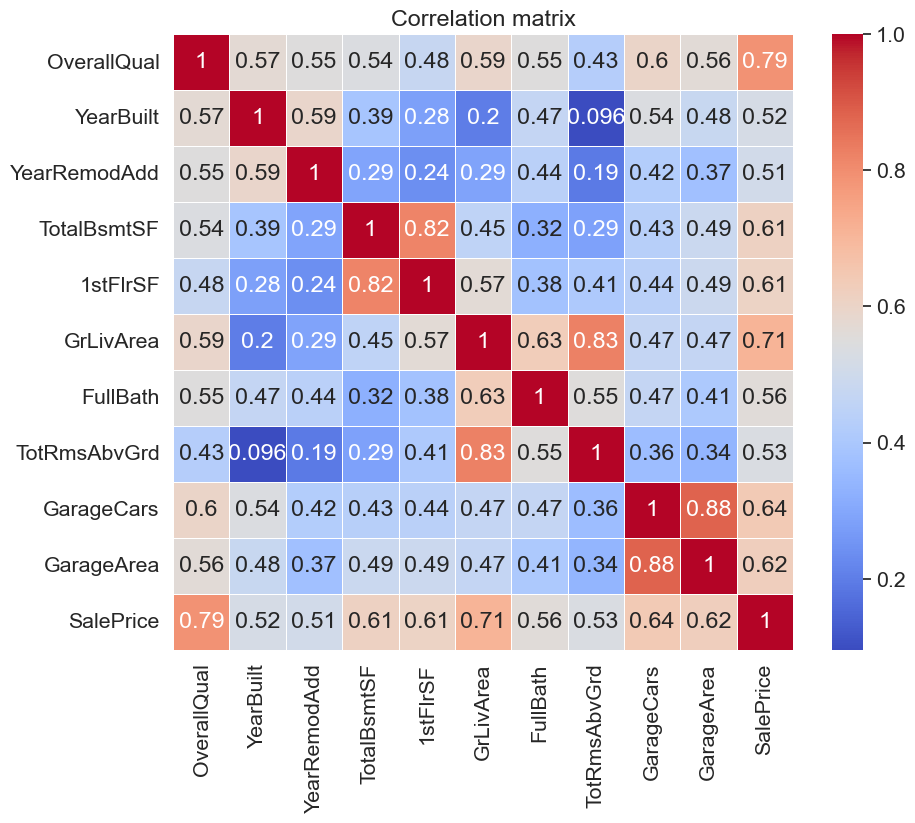

In [20]:
# Строим тепловую карту
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(corr_table, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix')

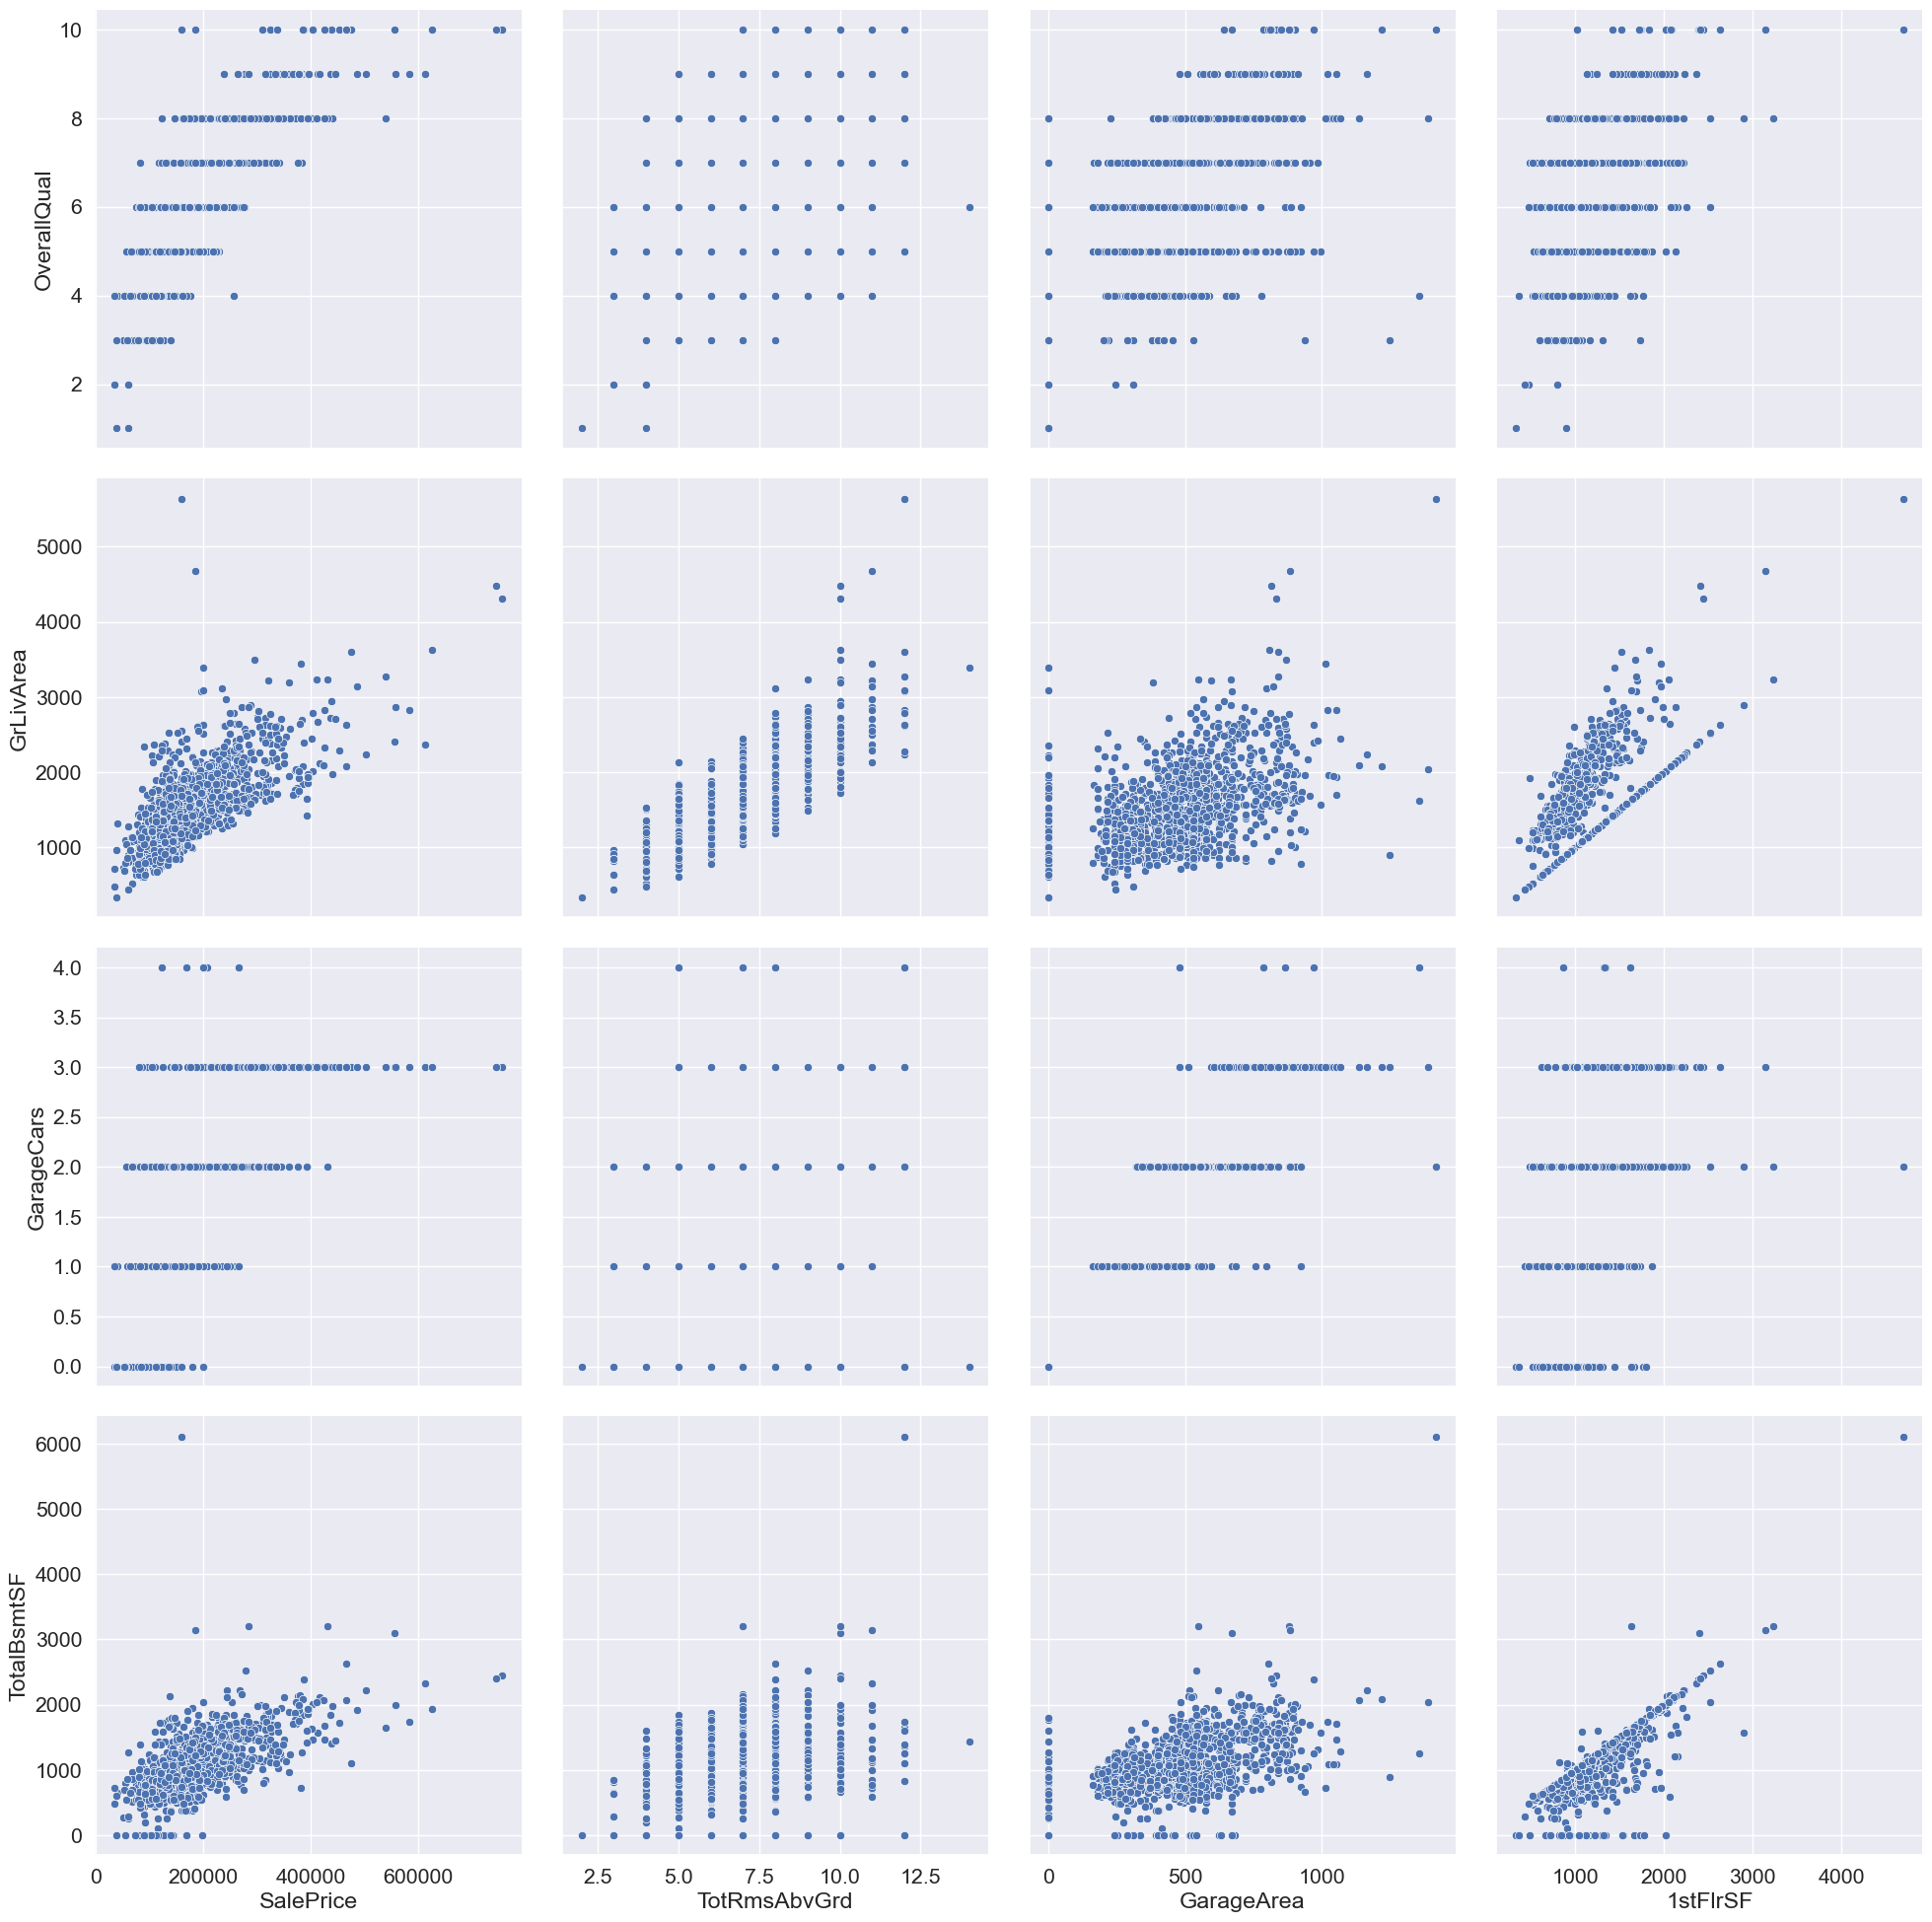

In [21]:
# Сильные взаимосвязи отобразим в виде отдельных графиков
g=sns.PairGrid(df, x_vars=['SalePrice','TotRmsAbvGrd', 'GarageArea', '1stFlrSF'], 
               y_vars=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF'], height=5)
g.map(sns.scatterplot)

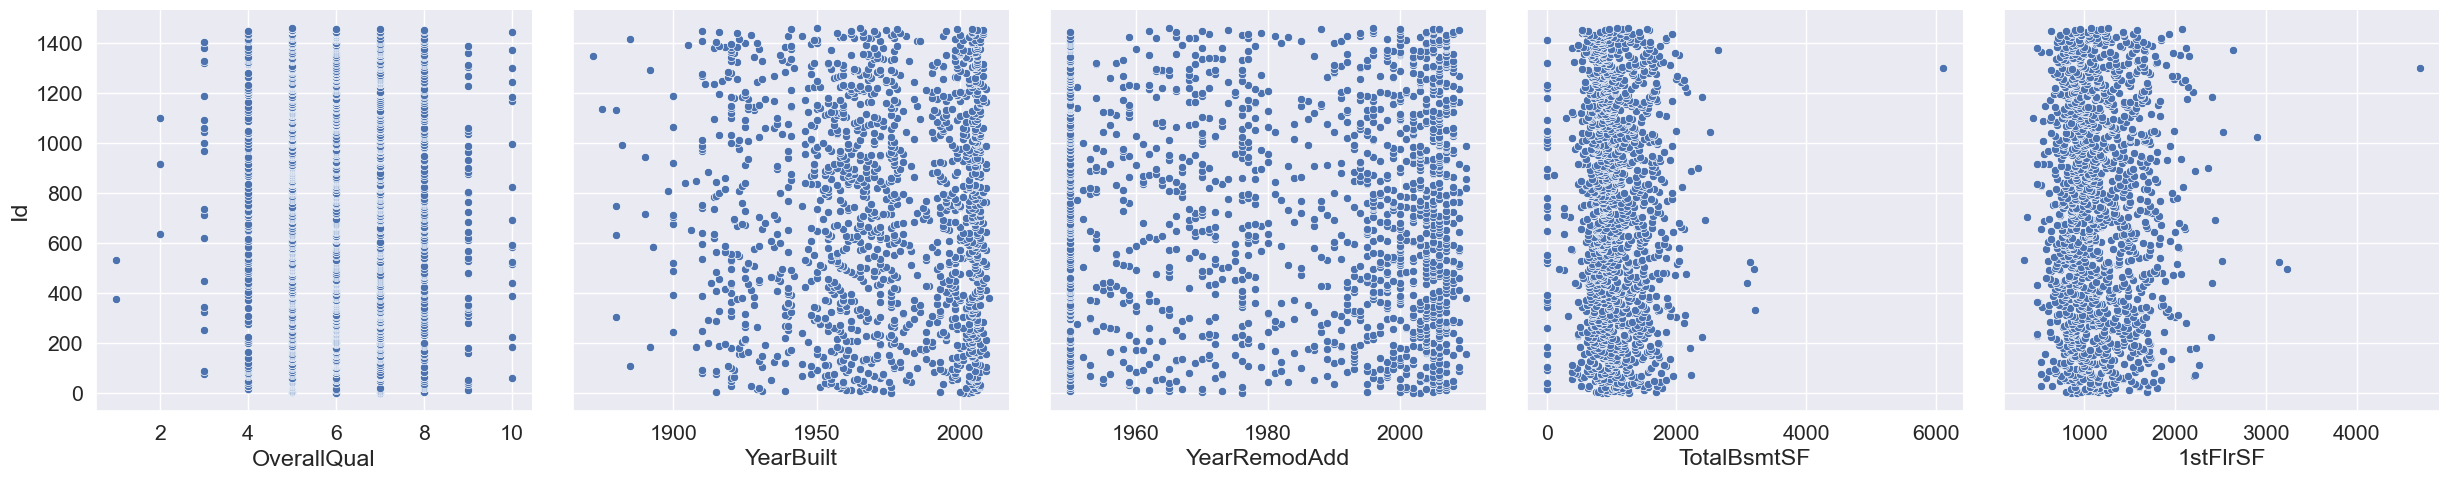

In [35]:
# графики распределения остальных важных характеристик (кроме SalePrice)
g=sns.PairGrid(df, x_vars=temp_name[:5], y_vars=['Id'], height=5)
g.map(sns.scatterplot)

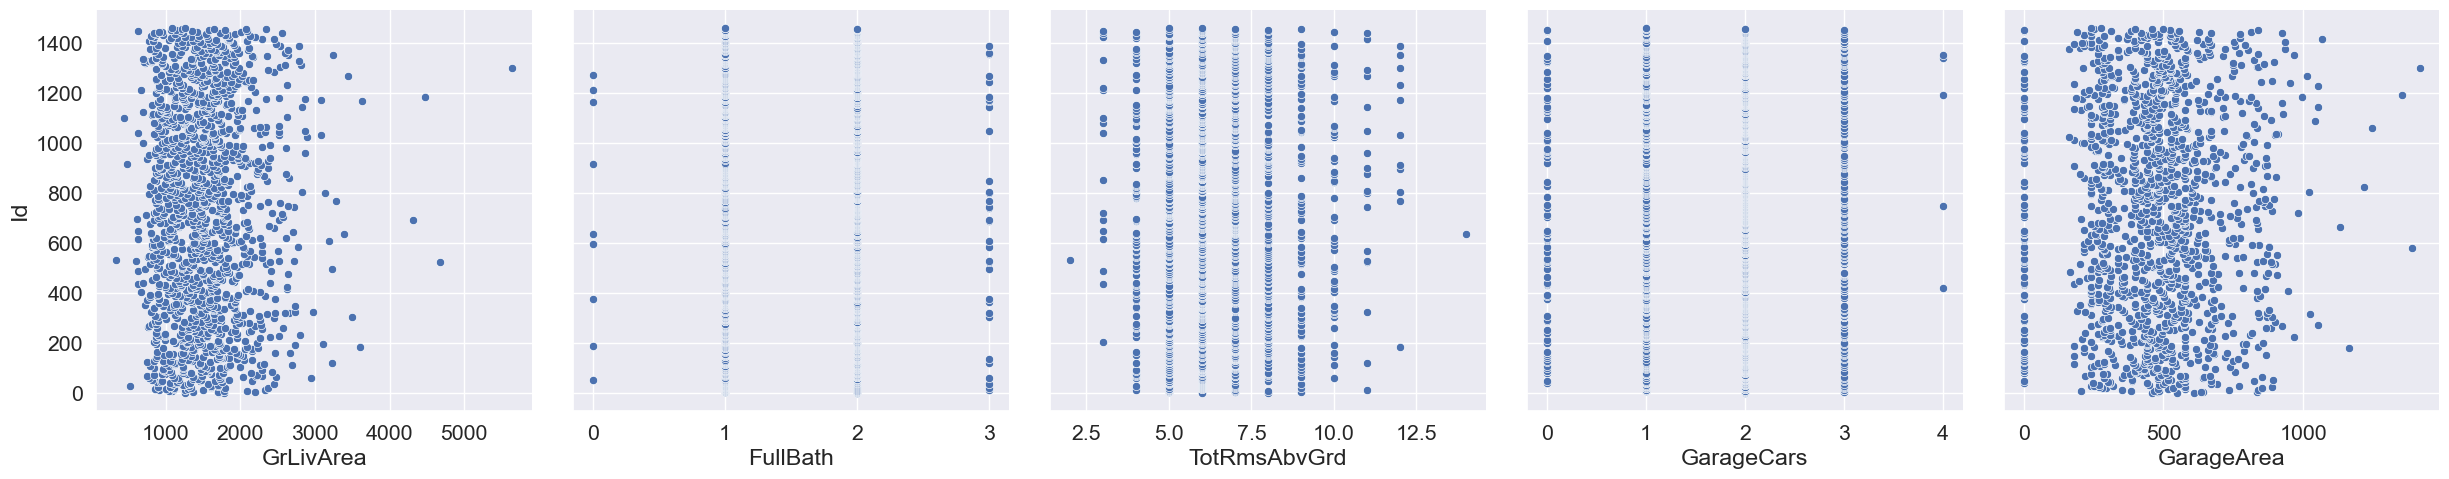

In [38]:
g=sns.PairGrid(df, x_vars=temp_name[5:-1], y_vars=['Id'], height=5)
g.map(sns.scatterplot)

In [24]:
# Выполните проектирование признаков путем реализации следующих преобразований: a. Работайте с категориальными переменными, 
# применяя one-hot encoding или label encoding, в зависимости от характера переменной. 

In [25]:
# выведем количество уникальных значений для каждого столбца
df.nunique()
# делаем вывод, что для one-hot encoding подходят такие характеристики как Street, Utilities, CentralAir
# произведем преобразование для Utilities

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrArea        328
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBa

In [26]:
df = pd.get_dummies(df, columns=['Utilities'])

In [27]:
# произведем преобразование MSZoning с помощью label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['MSZoning_encod'] = le.fit_transform(df['MSZoning'])

In [28]:
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Utilities_AllPub,Utilities_NoSeWa,MSZoning_encod
1449,1450,180,RM,21.0,1533,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,5,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,553,Unf,0,77,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,Ex,3,Typ,0,Attchd,1978.506164,Unf,0,0,TA,TA,Y,0,0,0,0,0,0,0,8,2006,WD,Abnorml,92000,True,False,4
614,615,180,RM,21.0,1491,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,SFoyer,4,6,1972,1972,Gable,CompShg,CemntBd,CmentBd,0.0,TA,TA,CBlock,Gd,TA,Av,LwQ,150,GLQ,480,0,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,TA,3,Typ,0,Attchd,1978.506164,Unf,0,0,TA,TA,Y,96,24,0,0,0,0,0,5,2010,WD,Normal,75500,True,False,4
1331,1332,80,RL,55.0,10780,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,SLvl,5,5,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,TA,TA,Av,ALQ,483,Unf,0,428,911,GasA,Gd,Y,SBrkr,954,0,0,954,0,0,1,0,3,1,TA,6,Typ,0,Detchd,1976.000000,Unf,2,576,TA,TA,Y,0,0,0,0,0,0,0,7,2006,WD,Normal,132500,True,False,3
1292,1293,70,RM,60.0,6600,Pave,Reg,Lvl,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,4,1892,1965,Gable,CompShg,Wd Sdng,Wd Sdng,0.0,TA,TA,Stone,TA,TA,No,Unf,0,Unf,0,994,994,GasA,TA,N,SBrkr,1378,994,0,2372,0,0,2,0,4,2,TA,11,Min2,0,Attchd,1985.000000,RFn,1,432,TA,TA,Y,0,287,0,0,0,0,0,12,2009,WD,Normal,107500,True,False,4
526,527,20,RL,70.0,13300,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1956,2000,Hip,CompShg,Wd Sdng,Wd Sdng,0.0,TA,TA,CBlock,Gd,TA,No,Rec,377,Unf,0,551,928,GasA,TA,Y,SBrkr,928,0,0,928,0,0,1,0,2,1,TA,4,Typ,0,Attchd,1956.000000,Unf,1,252,TA,TA,Y,261,0,156,0,0,0,0,6,2007,WD,Normal,132000,True,False,3


In [29]:
# b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, 
# путем объединения существующих характеристик.

# рассчитаем общую площадь внутренней части дома используя следуюшие данные:
# - 1stFlrSF: квадратные футы первого этажа
# - 2ndFlrSF: квадратные футы второго этажа
# - TotalBsmtSF: Общая площадь подвала в квадратных футах

In [30]:
df['TotalHsAr'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Utilities_AllPub,Utilities_NoSeWa,MSZoning_encod,TotalHsAr
91,92,20,RL,85.0,8500,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,3,1961,1961,Hip,CompShg,HdBoard,HdBoard,203.0,TA,TA,CBlock,TA,TA,No,Rec,600,Unf,0,635,1235,GasA,TA,Y,SBrkr,1235,0,0,1235,0,0,1,0,2,1,TA,6,Typ,0,Attchd,1961.0,Unf,2,480,TA,TA,Y,0,0,0,0,0,0,0,12,2006,WD,Abnorml,98600,True,False,3,2470
134,135,20,RL,78.0,10335,Pave,IR1,Lvl,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1968,1993,Gable,CompShg,Plywood,Plywood,0.0,TA,TA,CBlock,TA,TA,No,Rec,570,Unf,0,891,1461,GasA,Gd,Y,SBrkr,1721,0,0,1721,0,0,2,1,3,1,TA,7,Min1,1,Attchd,1968.0,RFn,2,440,TA,TA,Y,0,96,180,0,0,0,0,7,2006,WD,Normal,180000,True,False,3,3182
345,346,50,RL,65.0,6435,Pave,Reg,Lvl,Inside,Gtl,BrkSide,RRAn,Norm,1Fam,1.5Fin,6,5,1939,1950,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,972,972,GasA,Gd,Y,SBrkr,972,605,0,1577,0,0,1,0,3,1,Fa,6,Typ,1,Detchd,1939.0,Unf,1,312,TA,TA,Y,0,0,0,0,0,0,0,10,2006,WD,Normal,140200,True,False,3,2549
1361,1362,20,RL,124.0,16158,Pave,IR1,Low,Inside,Mod,StoneBr,Norm,Norm,1Fam,1Story,7,5,2005,2005,Hip,CompShg,VinylSd,VinylSd,16.0,Gd,TA,PConc,Ex,TA,Av,ALQ,1274,Unf,0,256,1530,GasA,Ex,Y,SBrkr,1530,0,0,1530,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2005.0,Fin,2,430,TA,TA,Y,168,36,0,0,0,0,0,6,2009,WD,Normal,260000,True,False,3,3060
15,16,45,RM,51.0,6120,Pave,Reg,Lvl,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,7,8,1929,2001,Gable,CompShg,Wd Sdng,Wd Sdng,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,832,832,GasA,Ex,Y,FuseA,854,0,0,854,0,0,1,0,2,1,TA,5,Typ,0,Detchd,1991.0,Unf,2,576,TA,TA,Y,48,112,0,0,0,0,0,7,2007,WD,Normal,132000,True,False,4,1686


In [31]:
# Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.
df.to_csv('cleaned_house_prices.csv', header = True, index=False)